In [1]:
from sklearn.datasets import load_digits
import numpy as np
#import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=load_digits()

In [3]:
print(data)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [7]:
print("shape of target",data.target.shape)

shape of target (1797,)


In [5]:
print("image data shape",data.data.shape)

image data shape (1797, 64)


In [4]:
import matplotlib.pyplot as plt

In [8]:
plt.figure(figsize=(20,4))

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

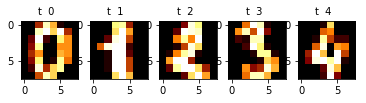

In [10]:
for index ,(image,label) in enumerate(zip(data.data[0:5],data.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.afmhot)
    plt.title("t %  d  "%  label,fontsize=10)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.20,random_state=2)

In [12]:
print(x_train.shape)
print(x_test.shape)

(1437, 64)
(360, 64)


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
print(lr.predict(x_test[0].reshape(1,-1)))
lr.predict(x_test[0:10])

[4]


array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [16]:
predictor=lr.predict(x_test)

In [17]:
score=lr.score(x_test,y_test)

In [18]:
print(score)

0.9361111111111111


In [19]:
from sklearn import metrics

In [20]:
cm=metrics.confusion_matrix(y_test,predictor)
print(cm)

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  3  2  0]
 [ 0  2  0  0 31  0  0  0  1  1]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  2  0  0  0  0  0  0 33  1]
 [ 0  0  0  1  0  1  0  1  3 22]]


Text(0.5, 1.0, 'accuracy 0.9361111111111111 ')

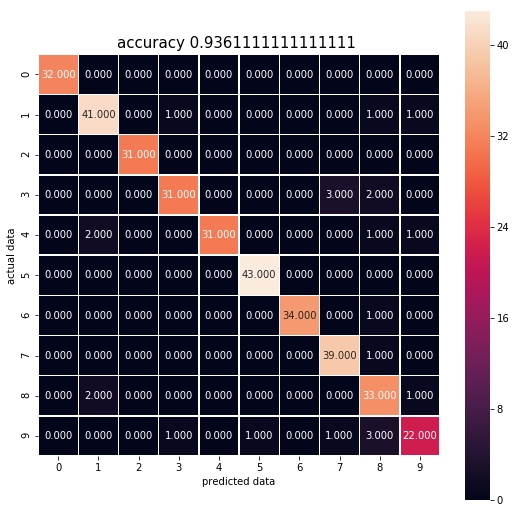

In [21]:
import seaborn as sns 
plt.figure(figsize=(9,9))
sns.heatmap(cm,fmt=".3f",annot=True,linewidths=.5 ,square=True )
plt.ylabel("actual data")
plt.xlabel("predicted data")
all_title="accuracy {0} ".format(score)
plt.title(all_title,size=15)